In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Pre-proccessing data steps:

In [2]:
df = pd.read_csv('steps.csv',sep=';') #firsly we read the csv file and reduce ";" from there
df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df1 = pd.read_csv('survey.csv') #firsly we read the csv file
df1.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


After reading our files, we have to combine them into one file by .merge():

In [4]:
df2 = pd.merge(df,df1, on="id") #combining two files
df2.head()


,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


Now I need to find out which is the mean steps per pericipan by using .loc and choosing all the time period.Let's take a look at the head() of it:

In [5]:
df2["mean_steps"] = df.loc[:,"20-6-2013":"13-5-2014"].mean(axis=1)
print('The mean steps per participant is:')
print(df2["mean_steps"])

The mean steps per participant is:
0      10205.521212
1       5687.423313
2       8301.729730
3       3633.200000
4       5312.129630
           ...     
924     6282.131868
925     4799.880000
926    10030.326829
927    15679.679012
928     7584.467153
Name: mean_steps, Length: 929, dtype: float64


Correlation matrix of the three quantative variables: height, weight, mean steps.

In [6]:
corr = df2[['height','weight','mean_steps']].corr() #I'm leaving out the corrected variables (divided by 1 million)
corr

,height,weight,mean_steps
height,1.000000,0.265138,-0.069667
weight,0.265138,1.000000,-0.016293
mean_steps,-0.069667,-0.016293,1.000000


We see that mean steps depend the most on the height of the participant. 

In [7]:
df3 = df2[['height','weight','mean_steps']]
df3.head()

,height,weight,mean_steps
0,178.0,98.0,10205.521212
1,180.0,77.0,5687.423313
2,180.0,83.0,8301.729730
3,178.0,80.0,3633.200000
4,167.0,61.0,5312.129630


In order to see the dependence better we will create the graphics. Scatter plots of the 3 quantative variables:

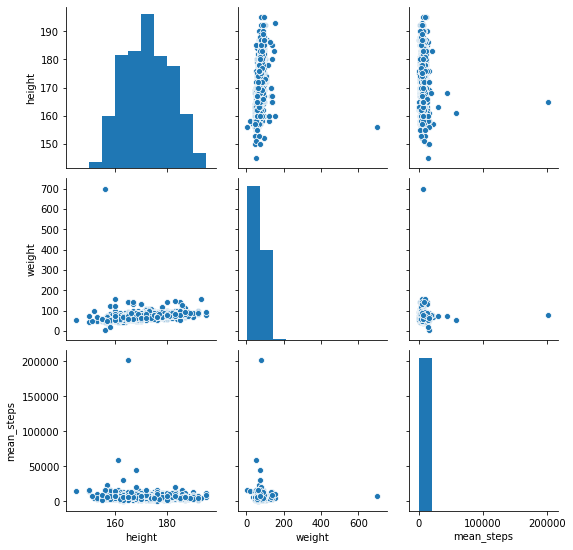

In [8]:
sns.pairplot(df3)
plt.show() #using Matplotlib to show the plot

People with the height between 160-170 cm are most likely to make some steps "record" and are the most active group.

Now let's create and take a look at Pearson’s correlation of 2 relations:

In [9]:
from scipy.stats.stats import pearsonr #We will need the correlation function from the scientific package scipy


print(pearsonr(corr['height'],corr['mean_steps']))
print(pearsonr(corr['weight'],corr['mean_steps']))

(-0.769988324004419, 0.44052399588362046)
(-0.6822222733836628, 0.5220272850747725)


The relation of mean steps per participant with a qualitative variable "gender" with two levels:

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

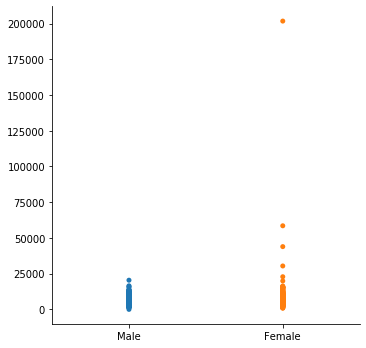

In [11]:
sns.catplot(x=df2["gender"], y=df2["mean_steps"], jitter=False, data=df2)

We see that women tend to make more steps so their mean is higher and in some case can be recordly high